In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

why is data leakage important to know <br>
1. It causes a model to overpresent its generalization error, which makes 
it useless for any real world application. Therefore caution must be taken, else when deployesd in
production for any application will cause the application to fail miserably


Causes of data leakge: <br>
    1. Duplicates <br>
    2. Leaky Predictors <br>
    3. Pre processing activities <br>

In [13]:
df = {
    'purchase': ['yes','yes','yes','no','no','yes','no'],
    'QTY':[2,3,4,5,6,7,8],
    'product':['Milk','Sugar','Biscuit','Chocolate','Coffee','Bread','Egg'],
    'discount':['yes','no','yes','no','no','yes','no']
               }

In [14]:
df = pd.DataFrame(df)

In [15]:
df

,purchase,QTY,product,discount
0,yes,2,Milk,yes
1,yes,3,Sugar,no
2,yes,4,Biscuit,yes
3,no,5,Chocolate,no
4,no,6,Coffee,no
5,yes,7,Bread,yes
6,no,8,Egg,no


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

purch = le.fit_transform(df.purchase)
dis = le.fit_transform(df.discount)

df.purchase = purch
df.discount = dis


In [34]:
prod = le.fit_transform(df['product'])
prod

array([5, 6, 0, 2, 3, 1, 4])

In [37]:
df['product'] = prod

In [38]:
df

,purchase,QTY,product,discount
0,1,2,5,1
1,1,3,6,0
2,1,4,0,1
3,0,5,2,0
4,0,6,3,0
5,1,7,1,1
6,0,8,4,0


In [39]:
df.corr()

,purchase,QTY,product,discount
purchase,1.000000e+00,-0.577350,1.602469e-17,0.750000
QTY,-5.773503e-01,1.000000,-3.571429e-01,-0.288675
product,1.602469e-17,-0.357143,1.000000e+00,-0.433013
discount,7.500000e-01,-0.288675,-4.330127e-01,1.000000


<Axes: >

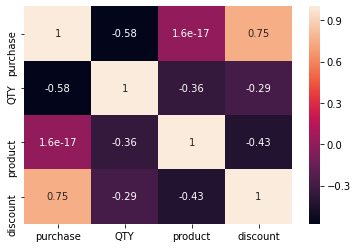

In [41]:
sns.heatmap(data= df.corr(), annot=True)

Split data into training and testing set
perform data preperation on training set
fit the model on training set
evaluate model on test/validation set

Preprocessing 

In [42]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                          n_redundant=2,
                          random_state=20)



In [43]:
print(X.shape, y.shape)

(1000, 10) (1000,)


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, 
                                                   random_state=50
                                                   )

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [50]:
from sklearn.metrics import *




In [51]:
y_pred = model.predict(X_train)

accuracy = accuracy_score(Y_train, y_pred)
print('Model accuracy on Training Set:', accuracy )



Model accuracy on Training Set: 0.88375


In [55]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print('Accuracy in testing set',accuracy)

Accuracy in testing set 0.915


Right way`

In [56]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                          n_redundant=2,
                          random_state=20)



In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, 
                                                   random_state=50
                                                   )

In [58]:
scaler = MinMaxScaler()

scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [59]:
model = LogisticRegression()
model.fit(X_train, Y_train)



LogisticRegression()

In [60]:
y_pred = model.predict(X_train)

accuracy = accuracy_score(Y_train, y_pred)
print('Model accuracy on Training Set:', accuracy )



Model accuracy on Training Set: 0.88625


In [61]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print('Accuracy in testing set',accuracy)

Accuracy in testing set 0.48


Using cross Validation

In [73]:
from sklearn.pipeline import Pipeline

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                          n_redundant=2,
                          random_state=20)

steps = list()

steps.append(('Scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(
    n_splits =10,
    n_repeats=3,
    random_state=10
)

scores= cross_val_score(pipeline, X, y, scoring='accuracy',cv=cv, n_jobs=-1 )
print('Accuracy: ',( np.mean(scores) *100))

Accuracy:  88.86666666666669


Accuracy: 89.14
